In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as  plt
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [23]:
housing=pd.read_csv('Housing.csv')
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
housing.mainroad = housing.mainroad.map(dict(yes=1,no=0))
housing.guestroom = housing.guestroom.map(dict(yes=1,no=0))
housing.basement = housing.basement.map(dict(yes=1,no=0))
housing.hotwaterheating = housing.hotwaterheating.map(dict(yes=1,no=0))
housing.airconditioning = housing.airconditioning.map(dict(yes=1,no=0))
housing.prefarea = housing.prefarea.map(dict(yes=1,no=0))

housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [25]:
housing.shape

(545, 13)

In [26]:
X = housing.iloc[:, 1:12].values
X.shape
X

array([[7420,    4,    2, ...,    1,    2,    1],
       [8960,    4,    4, ...,    1,    3,    0],
       [9960,    3,    2, ...,    0,    2,    1],
       ...,
       [3620,    2,    1, ...,    0,    0,    0],
       [2910,    3,    1, ...,    0,    0,    0],
       [3850,    3,    1, ...,    0,    0,    0]], dtype=int64)

In [27]:
Y = housing.iloc[:, 0].values
Y.shape

(545,)

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y =Y.reshape(-1,1)
Y.shape
#Y= scaler.fit_transform(Y)

(545, 1)

In [29]:
Y_st= scaler.fit_transform(Y)
Y_st.shape

(545, 1)

In [30]:
 #MSE=np.zeros(12)
#for k in range(1,12):  
    #pca = PCA(n_components = k)
   # principalComponents = pca.fit_transform(X)
    
X_train, X_test, Y_train, Y_test = train_test_split(X , Y_st, test_size = 0.2, random_state = 0)
    
    #print (f"nunmber of components (new features)= {k}")
model=LinearRegression()
model.fit(X_train, Y_train)
y_predict= model.predict(X_test)
    #svr = SVR(kernel='rbf', C=1e3, gamma=0.1).fit(X_train, Y_train)model.predict(
    #yfit = svr.predict(X_test)
    #score = svr.score(X_train,Y_train)
MSE= mean_squared_error(Y_test, y_predict)
    #print("R-squared:", score)
print("MSE:", MSE)


MSE: 0.2772509555876624


In [31]:
MSE=np.zeros(12)
for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_st, test_size = 0.2, random_state = 0)
    
    print (f"nunmber of components (new features)= {k}")
    #svr = SVR(kernel='rbf', C=1e3, gamma=0.1).fit(X_train, Y_train)
    model=LinearRegression()
    model.fit(X_train, Y_train)
    y_predict= model.predict(X_test)
       #svr = SVR(kernel='rbf', C=1e3, gamma=0.1).fit(X_train, Y_train)model.predict(
       #yfit = svr.predict(X_test)
       #score = svr.score(X_train,Y_train)
    MSE[k]= mean_squared_error(Y_test, y_predict)
       #print("R-squared:", score)
    print("MSE:", MSE[k])

nunmber of components (new features)= 1
MSE: 0.2839823621466368
nunmber of components (new features)= 2
MSE: 0.28242318579343395
nunmber of components (new features)= 3
MSE: 0.27644400835338107
nunmber of components (new features)= 4
MSE: 0.2758368188222069
nunmber of components (new features)= 5
MSE: 0.27859458422194255
nunmber of components (new features)= 6
MSE: 0.2786581166485704
nunmber of components (new features)= 7
MSE: 0.28751179745104544
nunmber of components (new features)= 8
MSE: 0.2957102958842918
nunmber of components (new features)= 9
MSE: 0.2860285761421754
nunmber of components (new features)= 10
MSE: 0.28742949180324806
nunmber of components (new features)= 11
MSE: 0.2772509555876623


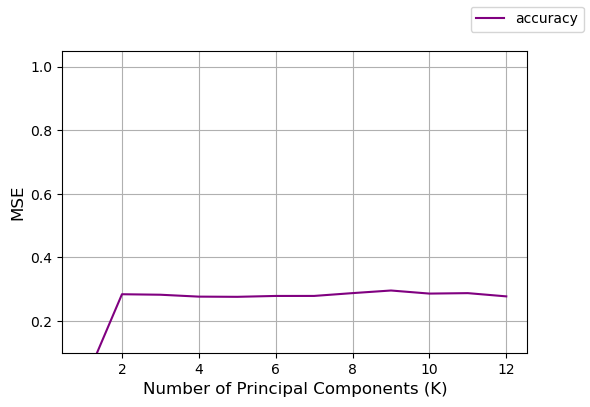

In [32]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([0.1, 1.05])
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("MSE", fontsize = 12)
plt.plot(xaxis, MSE, label="accuracy", color = 'purple') 
fig.legend(loc = "upper right")
plt.grid()